In [41]:
# 读取数据

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data= pd.read_csv("E:\Pycharm\Intrusion_Detection\kddcup.data_10_percent.csv",  header=None,names = col_names)
data.head()
#去重
data_1=data.drop_duplicates()
print(data_1.info())
#one-hot
dummies_protocol = pd.get_dummies(data_1["protocol_type"], prefix='protocol')
dummies_flag = pd.get_dummies(data_1["flag"], prefix='flag')
data_2 = pd.concat([data_1, dummies_protocol,dummies_flag], axis=1)
data_2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Data columns (total 42 columns):
duration                       145586 non-null int64
protocol_type                  145586 non-null object
service                        145586 non-null object
flag                           145586 non-null object
src_bytes                      145586 non-null int64
dst_bytes                      145586 non-null int64
land                           145586 non-null int64
wrong_fragment                 145586 non-null int64
urgent                         145586 non-null int64
hot                            145586 non-null int64
num_failed_logins              145586 non-null int64
logged_in                      145586 non-null int64
num_compromised                145586 non-null int64
root_shell                     145586 non-null int64
su_attempted                   145586 non-null int64
num_root                       145586 non-null int64
num_file_creations             145586 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,tcp,http,SF,212,1940,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,tcp,http,SF,159,4087,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0,tcp,http,SF,210,151,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0,tcp,http,SF,212,786,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Data columns (total 56 columns):
duration                       145586 non-null int64
protocol_type                  145586 non-null object
service                        145586 non-null object
flag                           145586 non-null object
src_bytes                      145586 non-null int64
dst_bytes                      145586 non-null int64
land                           145586 non-null int64
wrong_fragment                 145586 non-null int64
urgent                         145586 non-null int64
hot                            145586 non-null int64
num_failed_logins              145586 non-null int64
logged_in                      145586 non-null int64
num_compromised                145586 non-null int64
root_shell                     145586 non-null int64
su_attempted                   145586 non-null int64
num_root                       145586 non-null int64
num_file_creations             145586 

In [43]:
#特征选择
#建立X,y
feature_selection=["duration",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted",
    "num_access_files","num_outbound_cmds",
    "is_guest_login","rerror_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","protocol_icmp","protocol_tcp","protocol_udp",
    "flag_OTH","flag_REJ","flag_RSTO","flag_RSTOS0","flag_RSTR","flag_S0","flag_S1","flag_S2","flag_S3","flag_SF","flag_SH"]
X_3=data_2[feature_selection]
y_3=data_2['label'].copy()   #一维
##y的处理
u2r=["buffer_overflow.","loadmodule.","perl.","rootkit."]
r2l=["ftp_write.","imap.","guess_passwd.","phf.","spy.","multihop.","warezmaster.","warezclient."]
dos=["back.","land.","pod.","neptune.","smurf.","teardrop."]
probe=["satan.","portsweep.","ipsweep.","nmap."]
for i in u2r:
    y_3[y_3==i]="u2r"
for i in r2l:
    y_3[y_3==i]="r2l"
for i in dos:
    y_3[y_3==i]="dos"
for i in probe:
    y_3[y_3==i]="probe"
y_3[y_3=="normal."]="normal"

In [44]:
#过采样
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
X_4,y=oversampler.fit_sample(X_3,y_3)
#标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_4)
X=scaler.transform(X_4)  #X是ndarray
#分类器
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
##建立模型
clf_1 = RandomForestClassifier()
##模型评估
scores = cross_val_score(clf_1, X, y, cv=10)
print(scores.mean())

0.994819614736


In [45]:
#验证测试样本
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)  #切分样本
clf_1.fit(X_train,y_train)
preditions=clf_1.predict(X_test)

from  sklearn.metrics import accuracy_score
acc=accuracy_score(preditions,y_test) #计算accuracy
print(acc)

0.996516076145


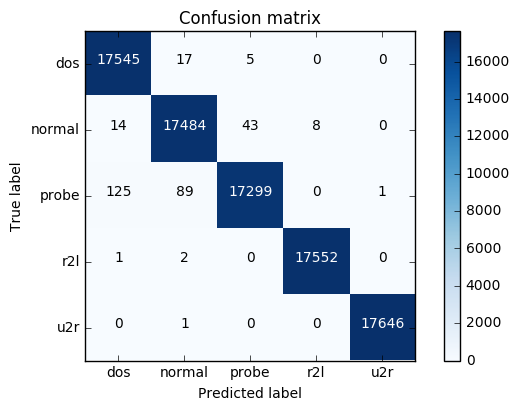

In [46]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#混淆矩阵
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,preditions)
class_names=['dos','normal','probe','r2l','u2r']
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [47]:
#分类报告
from sklearn.metrics import classification_report
class_names=['dos','normal','probe','r2l','u2r']
print(classification_report(y_test,preditions,target_names=class_names,digits=6))

             precision    recall  f1-score   support

        dos   0.992084  0.998748  0.995405     17567
     normal   0.993804  0.996296  0.995049     17549
      probe   0.997233  0.987724  0.992456     17514
        r2l   0.999544  0.999829  0.999687     17555
        u2r   0.999943  0.999943  0.999943     17647

avg / total   0.996525  0.996516  0.996513     87832



In [48]:
# from sklearn.metrics import matthews_corrcoef
# mcc=matthews_corrcoef(y_test,preditions)
# mcc

In [49]:
# 读取数据

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data_test= pd.read_csv("E:\Pycharm\Intrusion_Detection\corrected.csv",  header=None,names = col_names)
data_test.head()
#去重
data_test_1=data_test.drop_duplicates()
print(data_test_1.info())
#one-hot
dummies_protocol = pd.get_dummies(data_test_1["protocol_type"], prefix='protocol')
dummies_flag = pd.get_dummies(data_test_1["flag"], prefix='flag')
data_test_2 = pd.concat([data_test_1, dummies_protocol,dummies_flag], axis=1)
#特征选择
#建立X,y
feature_selection=["duration",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted",
    "num_access_files","num_outbound_cmds",
    "is_guest_login","rerror_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","protocol_icmp","protocol_tcp","protocol_udp",
    "flag_OTH","flag_REJ","flag_RSTO","flag_RSTOS0","flag_RSTR","flag_S0","flag_S1","flag_S2","flag_S3","flag_SF","flag_SH"]
X_test_1=data_test_2[feature_selection]
y_test_1=data_test_2['label'].copy()   #一维
##y的处理
u2r=["buffer_overflow.","loadmodule.","perl.","rootkit.","httptunnel.","ps.","sqlattack.","xterm."]
r2l=["ftp_write.","imap.","guess_passwd.","phf.","spy.","multihop.","warezmaster.","warezclient.","named.","sendmail."
    ,"snmpgetattack.","snmpguess.","worm.","xlock.","xsnoop."]
dos=["back.","land.","pod.","neptune.","smurf.","teardrop.","apache2.","mailbomb.","processtable.","udpstorm."]
probe=["satan.","portsweep.","ipsweep.","nmap.","mscan.","saint."]
for i in u2r:
    y_test_1[y_test_1==i]="u2r"
for i in r2l:
    y_test_1[y_test_1==i]="r2l"
for i in dos:
    y_test_1[y_test_1==i]="dos"
for i in probe:
    y_test_1[y_test_1==i]="probe"
y_test_1[y_test_1=="normal."]="normal"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77291 entries, 0 to 310931
Data columns (total 42 columns):
duration                       77291 non-null int64
protocol_type                  77291 non-null object
service                        77291 non-null object
flag                           77291 non-null object
src_bytes                      77291 non-null int64
dst_bytes                      77291 non-null int64
land                           77291 non-null int64
wrong_fragment                 77291 non-null int64
urgent                         77291 non-null int64
hot                            77291 non-null int64
num_failed_logins              77291 non-null int64
logged_in                      77291 non-null int64
num_compromised                77291 non-null int64
root_shell                     77291 non-null int64
su_attempted                   77291 non-null int64
num_root                       77291 non-null int64
num_file_creations             77291 non-null int64
num

In [50]:
data_test_2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,udp,private,SF,105,146,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,udp,private,SF,105,146,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,udp,domain_u,SF,29,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,udp,private,SF,105,146,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0,tcp,http,SF,223,185,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,0,tcp,http,SF,230,260,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,0,udp,private,SF,105,146,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,0,udp,private,SF,105,146,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


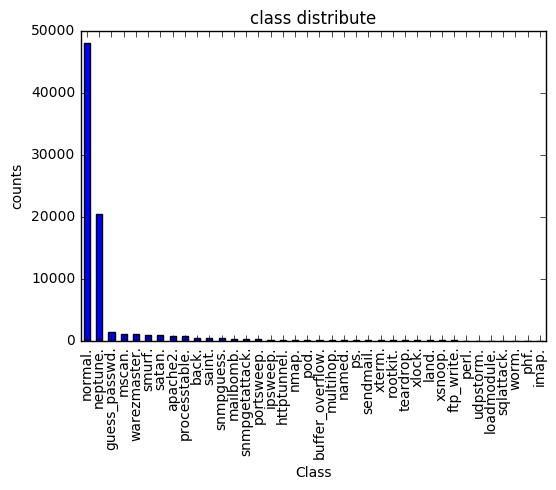

In [51]:
import matplotlib.pyplot as plt
plt.figure() 
data_test_2['label'].value_counts().plot(kind="bar")
plt.title("class distribute")
plt.xlabel("Class")
plt.ylabel("counts")
plt.show()

In [52]:
#标准化
X_test=scaler.fit_transform(X_test_1,scaler)  #X是ndarray
#验证测试集
pred_test=clf_1.predict(X_test)
pred_test

array(['dos', 'dos', 'dos', ..., 'dos', 'probe', 'normal'], dtype=object)

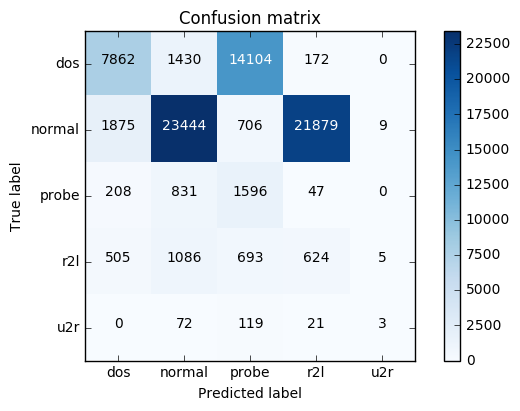

In [53]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#混淆矩阵
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test_1,pred_test)
class_names=['dos','normal','probe','r2l','u2r']
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [54]:
#分类报告
from sklearn.metrics import classification_report
class_names=['dos','normal','probe','r2l','u2r']
print(classification_report(y_test_1,pred_test,target_names=class_names,digits=6))

             precision    recall  f1-score   support

        dos   0.752344  0.333588  0.462226     23568
     normal   0.872725  0.489304  0.627046     47913
      probe   0.092694  0.595078  0.160402      2682
        r2l   0.027437  0.214212  0.048644      2913
        u2r   0.176471  0.013953  0.025862       215

avg / total   0.775156  0.433802  0.537124     77291



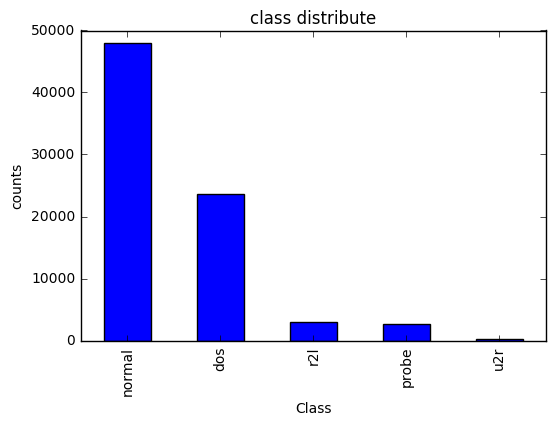

In [55]:
#查看label的分布(不平衡）
import matplotlib.pyplot as plt
plt.figure() 
y_test_1.value_counts().plot(kind="bar")
plt.title("class distribute")
plt.xlabel("Class")
plt.ylabel("counts")
plt.show()

In [22]:
# from sklearn.metrics import matthews_corrcoef
# mcc=matthews_corrcoef(y_test_1,pred_test)
# mcc

0.0